<a href="https://colab.research.google.com/github/wenjian98/lecture-1/blob/main/Week_6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/drive/MyDrive/CLV.csv")


In [4]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [6]:
df=df.drop('Unnamed: 0',axis=1)


In [7]:
X = df.drop('Customer Lifetime Value',axis=1)
y = df['Customer Lifetime Value']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [13]:
from sklearn.preprocessing import StandardScaler

In [17]:
Scaler1=StandardScaler().fit(X_test)
X_test_norm=Scaler1.transform(X_test)
Scaler2=StandardScaler().fit(X_train)
X_train_norm=Scaler2.transform(X_train)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [18]:
from sklearn.neural_network import MLPRegressor

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
clf= MLPRegressor()
params={'activation':['identity', 'logistic', 'tanh', 'relu'],
        'learning_rate':['constant', 'invscaling', 'adaptive']}

In [ ]:
grid=GridSearchCV(clf,params,cv=5)
grid.fit(X_train_norm,y_train)

In [22]:
grid.best_params_

{'activation': 'relu', 'learning_rate': 'adaptive'}

# 3.) Train a model with the optimal solution from GridSearch

In [23]:
clf_best=MLPRegressor(activation='relu',learning_rate='adaptive')

In [24]:
clf_best.fit(X_train_norm,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(learning_rate='adaptive')

# 4.) What are the in-sample and out of sample MSEs

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
pred_in=clf_best.predict(X_train_norm)

In [28]:
mse_in=mean_squared_error(pred_in,y_train)

In [29]:
mse_in

47687733.0550722

In [30]:
pred_out=clf_best.predict(X_test_norm)

In [31]:
mse_out=mean_squared_error(pred_out,y_test)

In [32]:
mse_out

43432642.25454527

# 5.) Build a Keras with the architecture defined by GridSearchCV

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [47]:
def baseline_model():

	model = Sequential()
	model.add(Dense(16, input_dim=16, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))

	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

In [48]:
model=KerasRegressor(build_fn=baseline_model)



<ipython-input-48-8c6aa7025162>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasRegressor(build_fn=baseline_model)


In [49]:
params={'batch_size':[100, 20, 50, 25, 30],
		'nb_epoch':[200, 250, 300, 400]}
gs=GridSearchCV(estimator=model, param_grid=params, cv=10)

gs = gs.fit(X_train_norm,y_train)



320/320 [==============================] - 1s 2ms/step - loss: 114413784.0000


In [52]:
gs.best_params_

{'batch_size': 20, 'nb_epoch': 400}

In [55]:
model.fit(X_train_norm, y_train, batch_size=20, epochs = 400)

Epoch 1/400
320/320 [==============================] - 3s 4ms/step - loss: 114412864.0000
Epoch 2/400
320/320 [==============================] - 2s 6ms/step - loss: 114177768.0000
Epoch 3/400
320/320 [==============================] - 1s 2ms/step - loss: 113710680.0000
Epoch 4/400
320/320 [==============================] - 1s 2ms/step - loss: 113044304.0000
Epoch 5/400
320/320 [==============================] - 1s 2ms/step - loss: 112208136.0000
Epoch 6/400
320/320 [==============================] - 1s 2ms/step - loss: 111217384.0000
Epoch 7/400
320/320 [==============================] - 1s 3ms/step - loss: 110091768.0000
Epoch 8/400
320/320 [==============================] - 1s 4ms/step - loss: 108849000.0000
Epoch 9/400
320/320 [==============================] - 1s 4ms/step - loss: 107501232.0000
Epoch 10/400
320/320 [==============================] - 1s 4ms/step - loss: 106058440.0000
Epoch 11/400
320/320 [==============================] - 1s 3ms/step - loss: 104535104.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [57]:
from tensorflow.keras.utils import plot_model

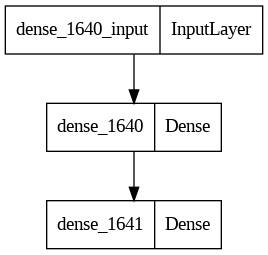

In [60]:
plot_model(baseline_model())


In [68]:
from ann_visualizer.visualize import ann_viz
import graphviz

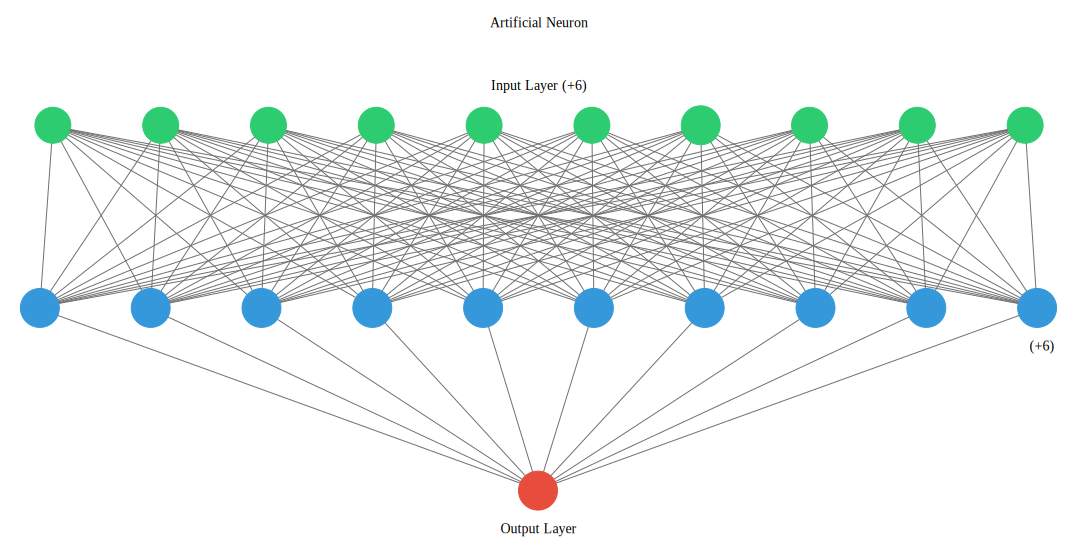

In [70]:
ann_viz(baseline_model(),filename='my_ann_model.gv',title='Artificial Neuron')
graph_file = graphviz.Source.from_file('my_ann_model.gv')
graph_file